# Hypothesis Testing - Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

## BUSINESS PROBLEM-1

In [91]:
Loansdata = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Basic Statistics - Hypothesis Testing\LoansData.csv")

Loansdata.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


#### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [10]:
Loansdata["Interest.Rate"] = Loansdata["Interest.Rate"].str.replace("%", "")

Loansdata["Interest.Rate"] = Loansdata["Interest.Rate"].astype("float")

In [14]:
Loansdata["Interest.Rate"] = Loansdata["Interest.Rate"].fillna(Loansdata["Interest.Rate"].mean())

Loansdata["Amount.Requested"] = Loansdata["Amount.Requested"].fillna(Loansdata["Amount.Requested"].mean())

In [15]:
stats.pearsonr(Loansdata["Interest.Rate"], Loansdata["Amount.Requested"])

(0.3324464059665682, 1.4148683739824417e-65)

#### b. Loan length is directly effecting intrest rate.

In [16]:
Loansdata["Loan.Length"] = Loansdata["Loan.Length"].str.replace("months", "")

Loansdata["Loan.Length"] = Loansdata["Loan.Length"].astype("float")

In [17]:
stats.pearsonr(Loansdata["Loan.Length"], Loansdata["Interest.Rate"])

(0.42417192416620575, 9.54959606435366e-110)

r = 0.42 which indicates moderate relationship. The P- value < 0.05 so we can reject the null hypothesis. We can say that at population level, loan length is directly affecting interest rate

#### c. Intrest rate varies for different purpose of loans

In [25]:
Loansdata["Loan.Purpose"].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [26]:
s1 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "debt_consolidation"]
s2 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "credit_card"]
s3 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "other"] 
s4 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "moving"]
s5 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "car"]
s6 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "vacation"]
s7 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "home_improvement"]
s8 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "house"]
s9 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "major_purchase"]
s10 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "educational"]
s11 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "medical"]
s12 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "wedding"]
s13 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "small_business"]
s14 = Loansdata["Interest.Rate"][Loansdata["Loan.Purpose"] == "renewable_energy"]

In [27]:
stats.f_oneway(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14)

F_onewayResult(statistic=7.482638784097435, pvalue=1.1599665535989115e-14)

#### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [96]:
cts = pd.crosstab(Loansdata["Home.Ownership"], Loansdata["FICO.Range"], margins = True )

cts

FICO.Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834,All
Home.Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,67,79,55,61,...,12,15,7,7,6,5,6,0,1,1146
NONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,5
OWN,1,0,0,0,17,18,13,11,9,10,...,2,1,1,3,2,1,0,1,0,200
RENT,4,2,0,3,67,75,90,75,91,65,...,5,4,5,2,3,2,0,0,0,1145
All,5,3,1,4,125,145,171,166,157,136,...,19,20,13,13,11,8,6,1,1,2497


In [97]:
stats.chi2_contingency(cts)

(473.05246368346025,
 4.020373769803923e-26,
 190,
 array([[2.29475370e+00, 1.37685222e+00, 4.58950741e-01, 1.83580296e+00,
         5.73688426e+01, 6.65478574e+01, 7.84805767e+01, 7.61858230e+01,
         7.20552663e+01, 6.24173008e+01, 6.42531037e+01, 7.02194634e+01,
         6.01225471e+01, 6.14993993e+01, 5.09435322e+01, 4.26824189e+01,
         5.23203845e+01, 4.31413696e+01, 4.31413696e+01, 2.98317982e+01,
         2.43243893e+01, 2.47833400e+01, 2.79959952e+01, 2.11117341e+01,
         2.11117341e+01, 1.65222267e+01, 7.80216260e+00, 1.00969163e+01,
         1.28506207e+01, 8.72006408e+00, 9.17901482e+00, 5.96635963e+00,
         5.96635963e+00, 5.04845815e+00, 3.67160593e+00, 2.75370445e+00,
         4.58950741e-01, 4.58950741e-01, 1.14600000e+03],
        [2.00240288e-03, 1.20144173e-03, 4.00480577e-04, 1.60192231e-03,
         5.00600721e-02, 5.80696836e-02, 6.84821786e-02, 6.64797757e-02,
         6.28754505e-02, 5.44653584e-02, 5.60672807e-02, 6.12735282e-02,
         5.2462

## BUSINESS PROBLEM - 2

#### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [41]:
price_quotes = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Basic Statistics - Hypothesis Testing\Price_Quotes.csv")

price_quotes.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [42]:
stats.pearsonr(price_quotes["Barry_Price"],price_quotes["Mary_Price"])

(0.8244127830429856, 0.0009709574235546202)

## BUSINESS PROBLEM - 3

#### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [2]:
Treatment_facility = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")

Treatment_facility.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [3]:
Pre_reengineer = Treatment_facility[Treatment_facility["Reengineer"] == "Prior"]

Post_reegineer = Treatment_facility[Treatment_facility["Reengineer"] == "Post"]

#### STAFF TURNOVER

In [ ]:
Ho: Reengineering effort has no impact on staff turnover
Ha: Reengineering effort has impact on staff turnover

In [52]:
stats.ttest_ind(Pre_reengineer["Employee_Turnover"], Post_reegineer["Employee_Turnover"],equal_var= False)

Ttest_indResult(statistic=-1.5653912078421088, pvalue=0.15207128913702453)

P values > 0.05 so we cannot reject NULL hypothesis. This means that at population there has been impact of reengineering effort on staff turnover

#### BEHAVORIAL PROBLEMS

In [53]:
stats.ttest_ind(Pre_reengineer["VAR4"], Post_reegineer["VAR4"],equal_var= False)

Ttest_indResult(statistic=3.6903825303098836, pvalue=0.0022744273676772084)

In [15]:
Pre_TRFF = round(Pre_reengineer["VAR4"].mean(), 2)
Post_TRFF = round(Post_reegineer["VAR4"].mean(),2)
print(Pre_TRFF,",",Post_TRFF)

20.54 , 9.23


The aveage TRFF has reduced post reegineering effort this signifies that behavorial issues has reduced

In [ ]:
Ho: Reengineering effort has no impact on the critical incident reports
Ha: Reengineering effort has impact on the critical incident reports

In [54]:
stats.ttest_ind(Pre_reengineer["VAR5"], Post_reegineer["VAR5"],equal_var= False)

Ttest_indResult(statistic=2.209006531430452, pvalue=0.045565519570193176)

In [16]:
Pre_CI = round(Pre_reengineer["VAR5"].mean(), 2)
Post_CI = round(Post_reegineer["VAR5"].mean(),2)
print(Pre_CI,",",Post_CI)

53.89 , 23.35


In [ ]:
The aveage CI has reduced post reegineering effort this signifies that behavorial issues has reduced

### BUSINESS PROBLEM-4

#### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

In [18]:
Priority_assessment = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")

Priority_assessment.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [ ]:
Ho: High(Avg.) =  Medium(Avg.) = Low(Avg.) OR The average time taken to process jobs is same across all the priorities
Ha: The average time taken to process any one priority is different from the other priorities

In [25]:
high = Priority_assessment[["Days"]][Priority_assessment["Priority"] == "High"]
medium = Priority_assessment[["Days"]][Priority_assessment["Priority"] == "Medium"]
low = Priority_assessment[["Days"]][Priority_assessment["Priority"] == "Low"]

In [26]:
stats.f_oneway(high,medium,low)

F_onewayResult(statistic=array([1.81231101]), pvalue=array([0.16411459]))

### BUSINESS PROBLEM-5

#### Use the survey results to address the following questions
#### 1. What is the overall level of customer satisfaction?
#### 2. What factors are linked to satisfaction?
#### 3. What is the demographic profile of Film on the Rocks patrons?
#### 4. In what media outlet(s) should the film series be advertised?

In [120]:
Films = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Basic Statistics - Hypothesis Testing\Films.csv")

del Films["_rowstate_"]

Films

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...
325,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


#### 1. What is the overall level of customer satisfaction?

In [12]:
satisfaction_mean = Films["Overall"].mean()
satisfaction_mean

1.6189024390243902

In [8]:
std = Films["Overall"].std()
std

0.6892863057161788

In [11]:
SE = std/(330**0.5)
SE

0.03794396231956619

With 95 % CI we can say that overall customer satisfaction will lie between range M-1.96*SE to M+1.96*SE                                                           

In [19]:
lr = round(satisfaction_mean-1.96*SE, 2)
hr = round(satisfaction_mean+1.96*SE, 2)
print (lr, ",", hr)

1.54 , 1.69


#### 2. What factors are linked to satisfaction?

In [121]:
Films["Gender"] = Films["Gender"].apply(lambda x: 1 if x == "Male" else (2 if x == "Female" else x))  
Films["Gender"] = Films["Gender"].astype("float")

In [122]:
Films["Marital_Status"] = Films["Marital_Status"].apply(lambda x: 1 if x == "Married" else (2 if x == "Single" else (2 if x == "Slngle" else x)))
Films["Marital_Status"] = Films["Marital_Status"].astype("float")

-----------------------------------------------------------------------------------------------------------------------------------

In [193]:
Films[["Gender", "Overall"]]

Gender = pd.crosstab(Films["Gender"], Films["Overall"], margins = True)

In [194]:
stats.chi2_contingency(Gender)

(4.307408141487173,
 0.9324155609249166,
 10,
 array([[ 53.40243902,  56.58536585,   4.24390244,   0.35365854,
           1.41463415, 116.        ],
        [ 97.59756098, 103.41463415,   7.75609756,   0.64634146,
           2.58536585, 212.        ],
        [151.        , 160.        ,  12.        ,   1.        ,
           4.        , 328.        ]]))

#### P-value > 0.05 so we cannot reject null hypothesis. We can't say that Gender is linked to satisfaction

In [195]:
Films[["Marital_Status", "Overall"]]

Marital_Status = pd.crosstab(Films["Marital_Status"], Films["Overall"], margins = True)
Marital_Status

Overall,1.0,2.0,3.0,4.0,5.0,All
Marital_Status,,,,,,
1.0,46,50,2,1,0,99
2.0,104,109,10,0,4,227
All,150,159,12,1,4,326


In [196]:
stats.chi2_contingency(Marital_Status)

(5.196534922270105,
 0.8776683933924561,
 10,
 array([[4.55521472e+01, 4.82852761e+01, 3.64417178e+00, 3.03680982e-01,
         1.21472393e+00, 9.90000000e+01],
        [1.04447853e+02, 1.10714724e+02, 8.35582822e+00, 6.96319018e-01,
         2.78527607e+00, 2.27000000e+02],
        [1.50000000e+02, 1.59000000e+02, 1.20000000e+01, 1.00000000e+00,
         4.00000000e+00, 3.26000000e+02]]))

#### P-value > 0.05 so we cannot reject null hypothesis. We can't say that Marital Status is linked to satisfaction

In [197]:
Sinage = pd.crosstab(Films["Sinage"], Films["Overall"], margins = True)
Sinage

Overall,1.0,2.0,3.0,4.0,5.0,All
Sinage,,,,,,
1.0,90,22,0,0,1,113
2.0,43,107,4,0,1,155
3.0,13,25,8,1,1,48
4.0,2,4,0,0,0,6
5.0,2,2,0,0,1,5
All,150,160,12,1,4,327


In [199]:
stats.chi2_contingency(Sinage)

(124.81695331531306,
 3.104822136693717e-15,
 25,
 array([[5.18348624e+01, 5.52905199e+01, 4.14678899e+00, 3.45565749e-01,
         1.38226300e+00, 1.13000000e+02],
        [7.11009174e+01, 7.58409786e+01, 5.68807339e+00, 4.74006116e-01,
         1.89602446e+00, 1.55000000e+02],
        [2.20183486e+01, 2.34862385e+01, 1.76146789e+00, 1.46788991e-01,
         5.87155963e-01, 4.80000000e+01],
        [2.75229358e+00, 2.93577982e+00, 2.20183486e-01, 1.83486239e-02,
         7.33944954e-02, 6.00000000e+00],
        [2.29357798e+00, 2.44648318e+00, 1.83486239e-01, 1.52905199e-02,
         6.11620795e-02, 5.00000000e+00],
        [1.50000000e+02, 1.60000000e+02, 1.20000000e+01, 1.00000000e+00,
         4.00000000e+00, 3.27000000e+02]]))

#### P-value < 0.05 so we can reject null hypothesis. We can say that Sinage is linked to satisfaction

In [200]:
Parking = pd.crosstab(Films["Parking"], Films["Overall"], margins = True)
Parking

Overall,1.0,2.0,3.0,4.0,5.0,All
Parking,,,,,,
1.0,105,26,2,0,1,134
2.0,40,109,3,0,1,153
3.0,4,20,5,0,0,29
4.0,2,3,1,0,1,7
5.0,0,1,1,1,1,4
All,151,159,12,1,4,327


In [201]:
stats.chi2_contingency(Parking)

(229.47943657632044,
 5.821924774203766e-35,
 25,
 array([[6.18776758e+01, 6.51559633e+01, 4.91743119e+00, 4.09785933e-01,
         1.63914373e+00, 1.34000000e+02],
        [7.06513761e+01, 7.43944954e+01, 5.61467890e+00, 4.67889908e-01,
         1.87155963e+00, 1.53000000e+02],
        [1.33914373e+01, 1.41009174e+01, 1.06422018e+00, 8.86850153e-02,
         3.54740061e-01, 2.90000000e+01],
        [3.23241590e+00, 3.40366972e+00, 2.56880734e-01, 2.14067278e-02,
         8.56269113e-02, 7.00000000e+00],
        [1.84709480e+00, 1.94495413e+00, 1.46788991e-01, 1.22324159e-02,
         4.89296636e-02, 4.00000000e+00],
        [1.51000000e+02, 1.59000000e+02, 1.20000000e+01, 1.00000000e+00,
         4.00000000e+00, 3.27000000e+02]]))

#### P-value < 0.05 so we can reject null hypothesis. We can say that Parking is linked to satisfaction

In [202]:
Clean = pd.crosstab(Films["Clean"], Films["Overall"], margins = True)
Clean

Overall,1.0,2.0,3.0,4.0,5.0,All
Clean,,,,,,
1.0,104,35,3,0,2,144
2.0,39,106,5,1,1,152
3.0,6,14,4,0,0,24
4.0,1,4,0,0,0,5
5.0,1,0,0,0,1,2
All,151,159,12,1,4,327


In [203]:
stats.chi2_contingency(Parking)

(229.47943657632044,
 5.821924774203766e-35,
 25,
 array([[6.18776758e+01, 6.51559633e+01, 4.91743119e+00, 4.09785933e-01,
         1.63914373e+00, 1.34000000e+02],
        [7.06513761e+01, 7.43944954e+01, 5.61467890e+00, 4.67889908e-01,
         1.87155963e+00, 1.53000000e+02],
        [1.33914373e+01, 1.41009174e+01, 1.06422018e+00, 8.86850153e-02,
         3.54740061e-01, 2.90000000e+01],
        [3.23241590e+00, 3.40366972e+00, 2.56880734e-01, 2.14067278e-02,
         8.56269113e-02, 7.00000000e+00],
        [1.84709480e+00, 1.94495413e+00, 1.46788991e-01, 1.22324159e-02,
         4.89296636e-02, 4.00000000e+00],
        [1.51000000e+02, 1.59000000e+02, 1.20000000e+01, 1.00000000e+00,
         4.00000000e+00, 3.27000000e+02]]))

#### P-value < 0.05 so we can reject null hypothesis. We can say that Cleanliness is linked to satisfaction

In [204]:
Age = pd.crosstab(Films["Age"], Films["Overall"], margins = True)
Age

Overall,1.0,2.0,3.0,4.0,5.0,All
Age,,,,,,
1.0,16,8,1,0,1,26
2.0,74,87,8,1,3,173
3.0,56,58,3,0,0,117
4.0,3,7,0,0,0,10
All,149,160,12,1,4,326


In [205]:
stats.chi2_contingency(Age)

(10.578834827658923,
 0.9564222769291328,
 20,
 array([[1.18834356e+01, 1.27607362e+01, 9.57055215e-01, 7.97546012e-02,
         3.19018405e-01, 2.60000000e+01],
        [7.90705521e+01, 8.49079755e+01, 6.36809816e+00, 5.30674847e-01,
         2.12269939e+00, 1.73000000e+02],
        [5.34754601e+01, 5.74233129e+01, 4.30674847e+00, 3.58895706e-01,
         1.43558282e+00, 1.17000000e+02],
        [4.57055215e+00, 4.90797546e+00, 3.68098160e-01, 3.06748466e-02,
         1.22699387e-01, 1.00000000e+01],
        [1.49000000e+02, 1.60000000e+02, 1.20000000e+01, 1.00000000e+00,
         4.00000000e+00, 3.26000000e+02]]))

#### P-value > 0.05 so we cannot reject null hypothesis. We can't say that Age is linked to satisfaction

In [206]:
Income = pd.crosstab(Films["Income"], Films["Overall"], margins = True)
Income

Overall,1.0,2.0,3.0,4.0,5.0,All
Income,,,,,,
1.0,65,67,7,1,1,141
2.0,41,36,4,0,1,82
3.0,38,50,1,0,1,90
All,144,153,12,1,3,313


In [207]:
stats.chi2_contingency(Income)

(5.6893972804194055,
 0.9845061670063463,
 15,
 array([[6.48690096e+01, 6.89233227e+01, 5.40575080e+00, 4.50479233e-01,
         1.35143770e+00, 1.41000000e+02],
        [3.77252396e+01, 4.00830671e+01, 3.14376997e+00, 2.61980831e-01,
         7.85942492e-01, 8.20000000e+01],
        [4.14057508e+01, 4.39936102e+01, 3.45047923e+00, 2.87539936e-01,
         8.62619808e-01, 9.00000000e+01],
        [1.44000000e+02, 1.53000000e+02, 1.20000000e+01, 1.00000000e+00,
         3.00000000e+00, 3.13000000e+02]]))

#### P-value > 0.05 so we cannot reject null hypothesis. We can't say that Income is linked to satisfaction

### Thus we can conclude that Sinage, Parking & Cleanliness are linked to Customer Satisfactions

#### 3. What is the demographic profile of Film on the Rocks patrons?

In [211]:
Demographic = Films[["Gender", "Marital_Status", "Age", "Income"]]

Demographic.head()

,Gender,Marital_Status,Age,Income
0,2.0,1.0,3.0,1.0
1,2.0,2.0,2.0,1.0
2,1.0,1.0,4.0,1.0
3,2.0,1.0,4.0,1.0
4,2.0,1.0,3.0,3.0


In [212]:
Demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          330 non-null    float64
 1   Marital_Status  328 non-null    float64
 2   Age             328 non-null    float64
 3   Income          314 non-null    float64
dtypes: float64(4)
memory usage: 10.4 KB


In [223]:
Male_count = Demographic.Gender[Demographic.Gender == 1].count()
Female_count = Demographic.Gender[Demographic.Gender == 2].count()

print(f"No. of males: {Male_count} & No. of Females: {Female_count}")

No. of males: 117 & No. of Females: 213


In [225]:
Married = Demographic.Marital_Status[Demographic.Marital_Status == 1].count()
Single = Demographic.Marital_Status[Demographic.Marital_Status == 2].count()

print(f"No. of married: {Married} & No. of single: {Single}")

No. of married: 100 & No. of single: 228


In [263]:
age1 = Demographic.Age[Demographic.Age == 1].count()
age2 = Demographic.Age[Demographic.Age == 2].count()
age3 = Demographic.Age[Demographic.Age == 3].count()
age4 = Demographic.Age[Demographic.Age == 4].count()

print(f"No. of users between 1 to 12: {age1} & No. of users between 13 to 30: {age2} , users between 31 to 60 {age3}, users between 60+ {age3}")

No. of users between 1 to 12: 26 & No. of users between 13 to 30: 175 , users between 31 to 60 117, users between 60+ 117


In [267]:
income1 = Demographic.Income[Demographic.Income == 1].count()
income2 = Demographic.Income[Demographic.Income == 2].count()
income3 = Demographic.Income[Demographic.Income == 3].count()


print(f"No. of users with less than $ 50,000: {income1} & No. of users between $50,000 to $100,000: {income2} No. of users more than $ 100,000: {income3} ")

No. of users with less than $ 50,000: 142 & No. of users between $50,000 to $100,000: 82 No. of users more than $ 100,000: 90 


In [236]:
Demographic.Gender = Demographic.Gender.astype("str")
Demographic.Gender.dtypes

Demographic.Marital_Status = Demographic.Marital_Status.astype("str")
Demographic.Marital_Status.dtypes

C:\Users\ronak\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('O')

In [246]:
cts = pd.crosstab(Demographic.Gender, Demographic.Marital_Status)
cts

Marital_Status,1.0,2.0,nan
Gender,,,
1.0,38,77,2
2.0,62,151,0


In [257]:
cts = cts.reset_index()
cts.rename(columns = {"1.0": "Married", "2.0": "Single"}, inplace = True)
cts

Marital_Status,level_0,index,Gender,Married,Single,nan
0,0,0,1.0,38,77,2
1,1,1,2.0,62,151,0


In [258]:
del cts["level_0"]
cts

Marital_Status,index,Gender,Married,Single,nan
0,0,1.0,38,77,2
1,1,2.0,62,151,0


In [259]:
del cts["index"]
cts

Marital_Status,Gender,Married,Single,nan
0,1.0,38,77,2
1,2.0,62,151,0


In [260]:
cts.set_index("Gender")

Marital_Status,Married,Single,nan
Gender,,,
1.0,38,77,2
2.0,62,151,0


Text(0.5, 1.0, 'Gender v/s Marital_Status')

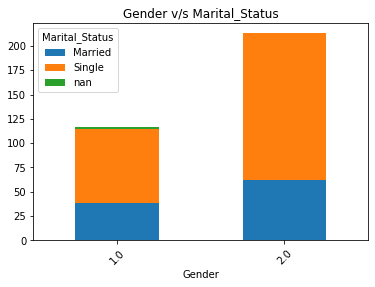

In [264]:
cts.plot(x = "Gender", kind = "bar", stacked = True)
plt.xticks(rotation = 45)
plt.title("Gender v/s Marital_Status")

In [272]:
income_age = Demographic[["Age", "Income"]]
income_age

inage = pd.crosstab(income_age.Income, income_age.Age)
inage

Age,1.0,2.0,3.0,4.0
Income,,,,
1.0,7,102,28,5
2.0,4,36,39,1
3.0,11,32,45,2


In [278]:
inage = inage.reset_index()
inage

Age,Income,1.0,2.0,3.0,4.0
0,1.0,7,102,28,5
1,2.0,4,36,39,1
2,3.0,11,32,45,2


In [284]:
inage = inage.rename(columns = {1.0: "Upto_12", 2.0: "Upto_30", 3.0: "Upto_60", 4.0: "Beyond_60"})
inage

Age,Income,Upto_12,Upto_30,Upto_60,Beyond_60
0,1.0,7,102,28,5
1,2.0,4,36,39,1
2,3.0,11,32,45,2


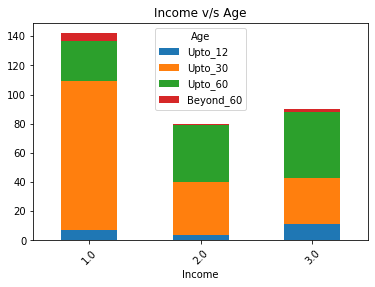

In [288]:
inage.plot(x = "Income", kind = "bar", stacked = True)
plt.xticks(rotation = 45)
plt.title("Income v/s Age")
plt.show()

### 5. In what media outlet(s) should the film series be advertised?

In [311]:
Hear_About = Films["Hear_About"].str.split(",").explode()
Hear_About.head()


0    5
1    5
2    5
3    5
4    1
Name: Hear_About, dtype: object

In [312]:
Hear_About = Hear_About.astype("str")
Source = Hear_About.reset_index()

Source.head()

,index,Hear_About
0,0,5
1,1,5
2,2,5
3,3,5
4,4,1


In [313]:
Hear_About = Source.groupby(by = "Hear_About").count()
Hear_About

,index
Hear_About,
1,23
2,14
3,17
4,45
5,232
nan,7


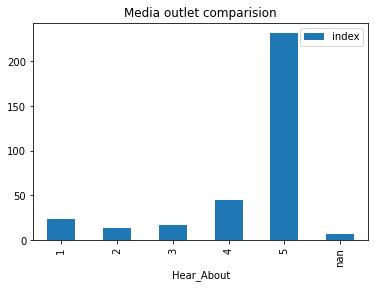

In [315]:
Hear_About.plot(kind = "bar")
plt.title("Media outlet comparision")
plt.show()

### The film is advertised most by WORD OF MOUTH and then comes WEBSITE

In [347]:
Media = Films[["Hear_About", "Overall"]]

Media.head()

,Hear_About,Overall
0,5,2.0
1,5,1.0
2,5,2.0
3,5,2.0
4,1,1.0


In [348]:
Media.Hear_About = Media.Hear_About.astype("str")
Media.Hear_About.dtypes

Media.Overall = Media.Overall.astype("str")
Media.Overall.dtypes

C:\Users\ronak\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('O')

In [349]:
new_df = pd.DataFrame(Media.Hear_About.str.split(',').tolist(), index=Media.Overall).stack()
new_df

Overall   
2.0      0    5
1.0      0    5
2.0      0    5
         0    5
1.0      0    1
             ..
         0    1
2.0      0    5
         0    5
1.0      0    3
         0    5
Length: 338, dtype: object

In [350]:
new_df = new_df.reset_index([0, 'Overall'])

In [351]:
new_df.head()

,Overall,0
0,2.0,5
1,1.0,5
2,2.0,5
3,2.0,5
4,1.0,1


In [352]:
new_df.columns = ['Overall', 'Hear_About']

In [353]:
new_df

,Overall,Hear_About
0,2.0,5
1,1.0,5
2,2.0,5
3,2.0,5
4,1.0,1
...,...,...
333,1.0,1
334,2.0,5
335,2.0,5
336,1.0,3


In [355]:
med = pd.crosstab(new_df["Hear_About"], new_df["Overall"], margins = True)
med

Overall,1.0,2.0,3.0,4.0,5.0,nan,All
Hear_About,,,,,,,
1,8,11,2,0,1,1,23
2,10,4,0,0,0,0,14
3,13,4,0,0,0,0,17
4,21,21,3,0,0,0,45
5,101,120,7,1,3,0,232
nan,4,2,0,0,0,1,7
All,157,162,12,1,4,2,338


In [356]:
stats.chi2_contingency(med)

(48.29631594679802,
 0.08265152853451956,
 36,
 array([[1.06834320e+01, 1.10236686e+01, 8.16568047e-01, 6.80473373e-02,
         2.72189349e-01, 1.36094675e-01, 2.30000000e+01],
        [6.50295858e+00, 6.71005917e+00, 4.97041420e-01, 4.14201183e-02,
         1.65680473e-01, 8.28402367e-02, 1.40000000e+01],
        [7.89644970e+00, 8.14792899e+00, 6.03550296e-01, 5.02958580e-02,
         2.01183432e-01, 1.00591716e-01, 1.70000000e+01],
        [2.09023669e+01, 2.15680473e+01, 1.59763314e+00, 1.33136095e-01,
         5.32544379e-01, 2.66272189e-01, 4.50000000e+01],
        [1.07763314e+02, 1.11195266e+02, 8.23668639e+00, 6.86390533e-01,
         2.74556213e+00, 1.37278107e+00, 2.32000000e+02],
        [3.25147929e+00, 3.35502959e+00, 2.48520710e-01, 2.07100592e-02,
         8.28402367e-02, 4.14201183e-02, 7.00000000e+00],
        [1.57000000e+02, 1.62000000e+02, 1.20000000e+01, 1.00000000e+00,
         4.00000000e+00, 2.00000000e+00, 3.38000000e+02]]))

P value < 0.1 we can reject null hypothesis and an state with 90% confidence internal that media outlet influences overall satiffactions